# Nick's First Homework Assignment

For this assignment, I chose to analyze 2017-2018 SHSAT Admissions Test Offers By Sending School.
This data set was one of the recently published datasets on the data catalog.
Ironically, my 12-year-old daughter has begun studying for the SHSAT, a test whose results are the single admissions factor for 8 specialized high schools in NYC.
The dataset is relatively small in both records and columns.
Some of the questions I answered were as follows:
* What was the distribution of students applying to High Schools this past year by borough?
* How many students took the SHSAT test and what did that distribution look like (both absolute and relative to the total students in each school)?
* What was the distribution of students who received offers from SHSAT schools?  What percentage of students who took the SHSAT received offers?
* Which schools had the highest percentage of students receive offers from SHSAT schools?
* lastly, where does my daughter's current middle school rank with regards to the other three middle schools she was considering… and where does it rank in general with all other nyc doe middle schools.

### data issues:
* the "Count of Students in HS Admissions",  "Count of Testers" and "Count of Offers" columns were non-numeric (or, in one case, null)… because any value below 6 was labeled "0-5".  I re-classified these values using the following logic:
  * if the "Count of Students in HS Admissions" was 0-5, I classified as 5.
  * if the "Count of Testers" was 0-5, I classified as 2.5.
  *  if the "Count of Offers" was 0-5, I classified as 0.

* in order to determine borough, I could have downloaded another dataset… but the Feeder Schhol DBN column (unique code for each school/record) has a letter as it's third column… and that letter represents the borough (M, B, X, Q, I).  I created a dictionary and then remapped to the appropriate borough.

In [43]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [44]:
nycSHSATDataAPI = pd.read_json('https://data.cityofnewyork.us/resource/bh8i-m8sm.json')

In [45]:
nycSHSATDataAPI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594 entries, 0 to 593
Data columns (total 5 columns):
count_of_offers                       594 non-null object
count_of_students_in_hs_admissions    593 non-null float64
count_of_testers                      594 non-null object
feeder_school_dbn                     594 non-null object
feeder_school_name                    594 non-null object
dtypes: float64(1), object(4)
memory usage: 23.3+ KB


In [46]:
nycSHSATDataAPI.rename(index=str, columns={"count_of_offers": "offers", "count_of_students_in_hs_admissions": "students",
                                          "count_of_testers": "test_takers","feeder_school_name":"school",
                                           "feeder_school_dbn":"school_dbn"},inplace = True)

In [18]:
#nycSHSATDataAPI.head(5)
#nycSHSATDataAPI.info()

In [47]:
# from above, I see one null value in float64 column for count_of_students_in_hs_admissions.
# I now want to observe this record to determine whether to exclude it or replace the null value.
# from line below, it appears as though the school has very few students, test_takers and offers.
nycSHSATDataAPI[nycSHSATDataAPI.students.isnull()]

,offers,students,test_takers,school_dbn,school
537,0-5,NaN,0-5,84M337,NEW YORK CENTER FOR AUTISM CHARTER SCHOOL


In [20]:
# I now what to look at the values for "count_of_testers" and "count_of_offers".
# I will sort each column and look at the head and tail
nycSHSATDataAPI.sort_values('test_takers').head(10)
# I can also do above using nlargest and nsmallest via: nycSHSATDataAPI.nlargest(5, 'students')

,offers,students,test_takers,school_dbn,school
441,0-5,74.0,0-5,29Q327,EAGLE ACADEMY FOR YOUNG MEN III
400,0-5,53.0,0-5,27Q183,P.S. 183 DR. RICHARD R. GREEN
63,0-5,71.0,0-5,04M372,ESPERANZA PREPARATORY ACADEMY
396,0-5,29.0,0-5,27Q114,P.S./M.S. 114 BELLE HARBOR
58,0-5,65.0,0-5,04M096,P.S. 096 JOSEPH LANZETTA
393,0-5,15.0,0-5,27Q047,P.S. 047 CHRIS GALAS
537,0-5,NaN,0-5,84M337,NEW YORK CENTER FOR AUTISM CHARTER SCHOOL
65,0-5,48.0,0-5,04M406,GLOBAL TECHNOLOGY PREPARATORY
391,0-5,56.0,0-5,27Q042,P.S./M.S. 042 R. VERNAM
541,0-5,101.0,0-5,84M353,NEW HEIGHTS ACADEMY CHARTER SCHOOL


In [21]:
# I know what to look at the test_takers data excluding values = "0-5".  if all others are numeric, maybe I can re-cast.
exclude_values=(nycSHSATDataAPI.test_takers != "0-5")
nycSHSATDataAPI[exclude_values].sort_values('test_takers').head(10)
nycSHSATDataAPI[exclude_values].sort_values('test_takers').tail(10)

,offers,students,test_takers,school_dbn,school
168,0-5,270.0,91,10X244,THE NEW SCHOOL FOR LEADERSHIP AND JOURNALISM
358,0-5,716.0,93,24Q061,I.S. 061 LEONARDO DA VINCI
310,20,130.0,93,20K229,P.S. 229 DYKER
245,19,184.0,94,15K443,NEW VOICES SCHOOL OF ACADEMIC & CREATIVE ARTS
459,62,119.0,94,30Q580,BACCALAUREATE SCHOOL FOR GLOBAL EDUCATION
258,0-5,274.0,96,17K061,M.S. 061 DR. GLADSTONE H. ATWELL
113,0-5,177.0,96,08X071,P.S. 071 ROSE E. SCALA
373,17,248.0,97,25Q189,J.H.S. 189 DANIEL CARTER BEARD
401,18,374.0,98,27Q202,J.H.S. 202 ROBERT H. GODDARD
337,7,294.0,98,22K278,J.H.S. 278 MARINE PARK


In [22]:
# check the same for offers as test_takers above
exclude_values=(nycSHSATDataAPI.offers != "0-5")
nycSHSATDataAPI[exclude_values].sort_values('offers').head(10)
nycSHSATDataAPI[exclude_values].sort_values('offers').tail(10)

,offers,students,test_takers,school_dbn,school
426,9,77.0,29,28Q896,"YOUNG WOMEN'S LEADERSHIP SCHOOL, QUEENS"
315,9,261.0,114,21K096,I.S. 096 SETH LOW
185,9,285.0,133,11X127,J.H.S. 127 THE CASTLE HILL
333,9,116.0,51,22K206,P.S. 206 JOSEPH F LAMB
88,9,65.0,24,06M278,PAULA HEDBAVNY SCHOOL
367,9,117.0,46,24Q128,"P.S. 128 THE LORRAINE TUZZO, JUNIPER VALLEY EL..."
8,91,136.0,126,01M539,"NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ..."
372,93,535.0,250,25Q185,J.H.S. 185 EDWARD BLEEKER
389,95,487.0,304,26Q216,J.H.S. 216 GEORGE J. RYAN
385,95,416.0,233,26Q074,J.H.S. 074 NATHANIEL HAWTHORNE


In [23]:
# from above, I have concluded that the only non-numeric in count_of_students_in_hs_admissions is a null value.
# I have also concluded that the only non-numeric values in count_of_testers and count_of_offers columns have a value of 0-5
# I will therefore replace those values, strategically, and then recast those columns as int32

In [24]:
#nycSHSATDataAPI.describe(include='all')
#nycSHSATDataAPI[nycSHSATDataAPI.students.isnull()]
#nycSHSATDataAPI.students.isnull().sum()
nycSHSATDataAPI.students.fillna('5',inplace=True);
nycSHSATDataAPI.test_takers.replace("0-5","2",inplace=True);
nycSHSATDataAPI.offers.replace("0-5","0",inplace=True);

In [33]:
nycSHSATDataAPI.info()

<class 'pandas.core.frame.DataFrame'>
Index: 594 entries, 0 to 593
Data columns (total 5 columns):
offers         594 non-null object
students       594 non-null object
test_takers    594 non-null object
school_dbn     594 non-null object
school         594 non-null object
dtypes: object(5)
memory usage: 27.8+ KB


In [34]:
# recast students, test_takers and offers as integers
nycSHSATDataAPI[["students","test_takers","offers"]]=nycSHSATDataAPI[["students","test_takers","offers"]].astype(int);

#drinks=pd.read_csv('http://bit.ly/drinksbycountry')
#drinks.loc[:,['beer_servings']].applymap(float)

In [35]:
nycSHSATDataAPI.info()

<class 'pandas.core.frame.DataFrame'>
Index: 594 entries, 0 to 593
Data columns (total 5 columns):
offers         594 non-null int32
students       594 non-null int32
test_takers    594 non-null int32
school_dbn     594 non-null object
school         594 non-null object
dtypes: int32(3), object(2)
memory usage: 20.9+ KB


In [36]:
# I will now add some columns that represent additional useful statistic
# pct of students who take the test, pct of students receive offers (and have taken test), pct of total students who receive offers
# additionally, I know that the third value in the feeder_school_dbn represents the borough, so I will add a borough column as well.
nycSHSATDataAPI['borough']=nycSHSATDataAPI.school_dbn.str[2];
nycSHSATDataAPI['pct_take_test'] = nycSHSATDataAPI['test_takers'] / nycSHSATDataAPI['students'];
nycSHSATDataAPI['pct_who_take_test_and_get_offer'] = nycSHSATDataAPI['offers'] / nycSHSATDataAPI['test_takers'];
nycSHSATDataAPI['pct_from_school_who_get_offer'] = nycSHSATDataAPI['offers'] / nycSHSATDataAPI['students'];

In [37]:
nycSHSATDataAPI.info()

<class 'pandas.core.frame.DataFrame'>
Index: 594 entries, 0 to 593
Data columns (total 9 columns):
offers                             594 non-null int32
students                           594 non-null int32
test_takers                        594 non-null int32
school_dbn                         594 non-null object
school                             594 non-null object
borough                            594 non-null object
pct_take_test                      594 non-null float64
pct_who_take_test_and_get_offer    594 non-null float64
pct_from_school_who_get_offer      594 non-null float64
dtypes: float64(3), int32(3), object(3)
memory usage: 39.4+ KB


In [38]:
cols = list(nycSHSATDataAPI.columns.values)
nycSHSATDataAPI=nycSHSATDataAPI[['school','school_dbn','borough','students','test_takers','offers',
                                'pct_take_test','pct_who_take_test_and_get_offer','pct_from_school_who_get_offer']]

In [39]:
nycSHSATDataAPI.info()

<class 'pandas.core.frame.DataFrame'>
Index: 594 entries, 0 to 593
Data columns (total 9 columns):
school                             594 non-null object
school_dbn                         594 non-null object
borough                            594 non-null object
students                           594 non-null int32
test_takers                        594 non-null int32
offers                             594 non-null int32
pct_take_test                      594 non-null float64
pct_who_take_test_and_get_offer    594 non-null float64
pct_from_school_who_get_offer      594 non-null float64
dtypes: float64(3), int32(3), object(3)
memory usage: 39.4+ KB


In [19]:
#nycSHSATDataAPI.groupby(['borough']).describe()

Text(0.5,1,'staten island student count')

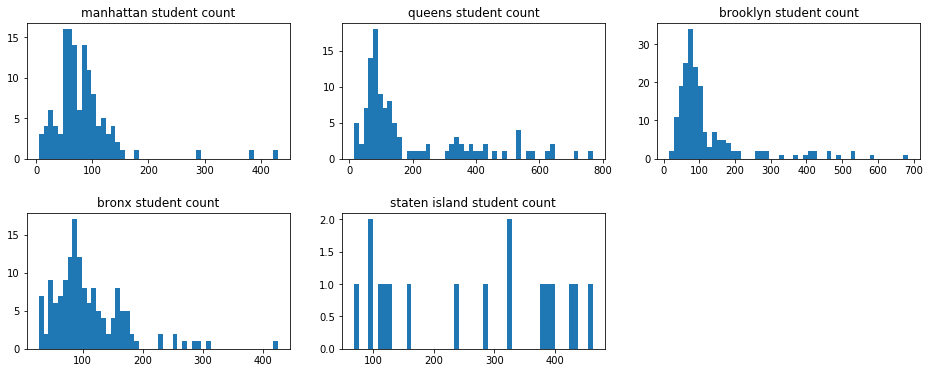

In [40]:
plt.figure(figsize = (16,6))
plt.subplots_adjust(hspace=0.4)
plt.subplot(2, 3, 1)
plt.hist(nycSHSATDataAPI[nycSHSATDataAPI.borough == "M"].students,bins=50);
plt.title("manhattan student count")
plt.subplot(2, 3, 2)
plt.hist(nycSHSATDataAPI[nycSHSATDataAPI.borough == "Q"].students,bins=50);
plt.title("queens student count")
plt.subplot(2, 3, 3)
plt.hist(nycSHSATDataAPI[nycSHSATDataAPI.borough == "K"].students,bins=50);
plt.title("brooklyn student count")
plt.subplot(2, 3, 4)
plt.hist(nycSHSATDataAPI[nycSHSATDataAPI.borough == "X"].students,bins=50);
plt.title("bronx student count")
plt.subplot(2, 3, 5)
plt.hist(nycSHSATDataAPI[nycSHSATDataAPI.borough == "R"].students,bins=50);
plt.title("staten island student count")

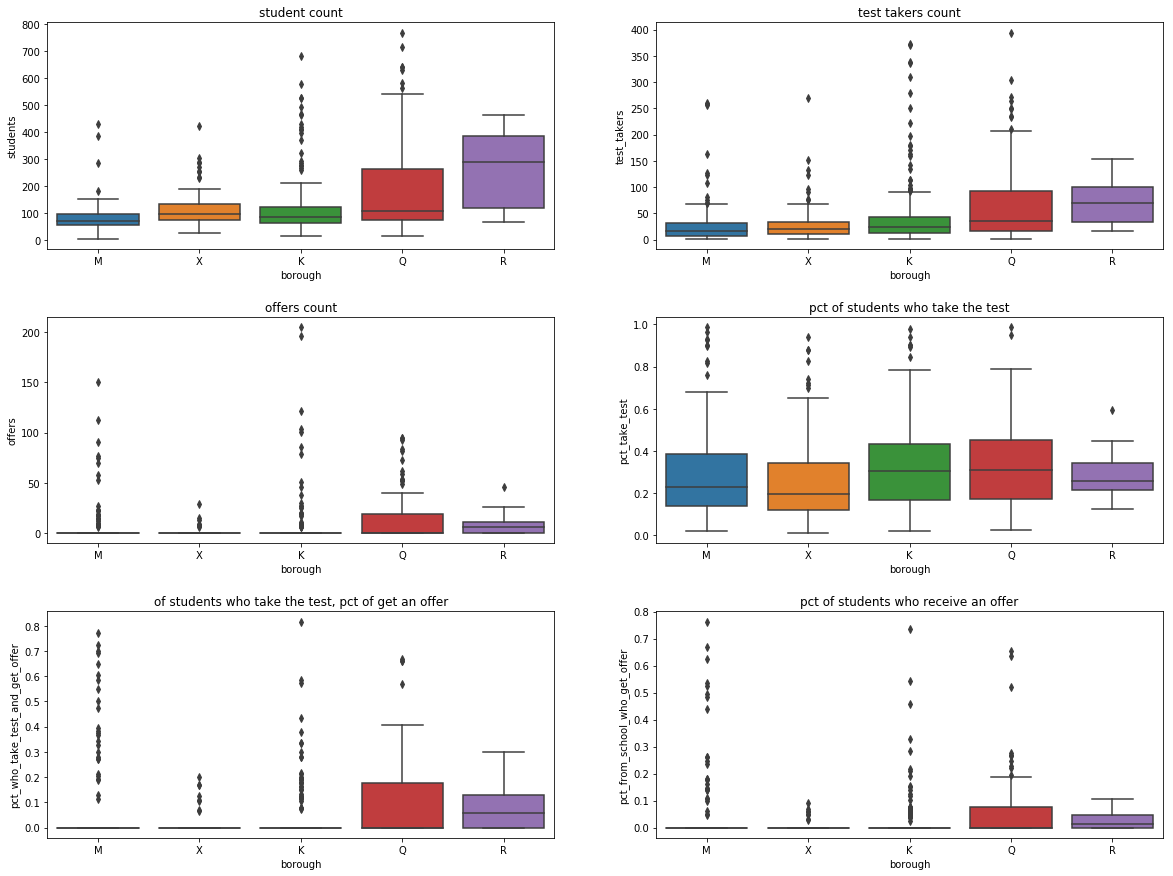

In [41]:
plt.figure(figsize = (20, 15))
plt.subplots_adjust(hspace=0.3)
plt.subplot(3, 2, 1)
sns.boxplot(nycSHSATDataAPI.borough,nycSHSATDataAPI.students);
plt.title("student count")
plt.subplot(3, 2, 2)
sns.boxplot(nycSHSATDataAPI.borough,nycSHSATDataAPI.test_takers);
plt.title("test takers count")
plt.subplot(3, 2, 3)
sns.boxplot(nycSHSATDataAPI.borough,nycSHSATDataAPI.offers);
plt.title("offers count")
plt.subplot(3, 2, 4)
sns.boxplot(nycSHSATDataAPI.borough,nycSHSATDataAPI.pct_take_test);
plt.title("pct of students who take the test");
plt.subplot(3, 2, 5)
sns.boxplot(nycSHSATDataAPI.borough,nycSHSATDataAPI.pct_who_take_test_and_get_offer);
plt.title("of students who take the test, pct of get an offer");
plt.subplot(3, 2, 6)
sns.boxplot(nycSHSATDataAPI.borough,nycSHSATDataAPI.pct_from_school_who_get_offer);
plt.title("pct of students who receive an offer");

In [22]:
# get top 5 by borough and aggregate with regard to pct of students in school who receive offers from a SHSAT school

In [42]:
#mylist=["borough","school","students","pct_from_school_who_get_offer"]
#nycSHSATDataAPI.nlargest(5,'pct_from_school_who_get_offer')[mylist]
rank_by_pct_offers_all_boroughs=nycSHSATDataAPI.nlargest(5,'pct_from_school_who_get_offer')
rank_by_pct_offers_all_manhattan=nycSHSATDataAPI[nycSHSATDataAPI.borough=='M'].nlargest(5,'pct_from_school_who_get_offer')
rank_by_pct_offers_all_queens=nycSHSATDataAPI[nycSHSATDataAPI.borough=='Q'].nlargest(5,'pct_from_school_who_get_offer')
rank_by_pct_offers_all_brooklyn=nycSHSATDataAPI[nycSHSATDataAPI.borough=='K'].nlargest(5,'pct_from_school_who_get_offer')
rank_by_pct_offers_all_bronx=nycSHSATDataAPI[nycSHSATDataAPI.borough=='X'].nlargest(5,'pct_from_school_who_get_offer')
rank_by_pct_offers_all_staten_island=nycSHSATDataAPI[nycSHSATDataAPI.borough=='R'].nlargest(5,'pct_from_school_who_get_offer')

# print the top 5 schools (based on pct of total students who receive offers)
rank_by_pct_offers_all_boroughs

,school,school_dbn,borough,students,test_takers,offers,pct_take_test,pct_who_take_test_and_get_offer,pct_from_school_who_get_offer
47,THE ANDERSON SCHOOL,03M334,M,76,75,58,0.986842,0.773333,0.763158
304,THE CHRISTA MCAULIFFE SCHOOL\I.S. 187,20K187,K,278,251,205,0.902878,0.816733,0.737410
8,"NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...",01M539,M,136,126,91,0.926471,0.722222,0.669118
447,P.S. 122 MAMIE FAY,30Q122,Q,75,74,49,0.986667,0.662162,0.653333
458,THE 30TH AVENUE SCHOOL (G&T CITYWIDE),30Q300,Q,41,39,26,0.951220,0.666667,0.634146


In [25]:
# print the top 5 schools (based on pct of total students who receive offers) by borough
top_values_by_borough=nycSHSATDataAPI.groupby(['borough'])['pct_from_school_who_get_offer'].nlargest(5).reset_index()
top_values_by_borough.set_index(["level_1"],inplace=True)
top_values_by_borough=top_values_by_borough.index.values
nycSHSATDataAPI.iloc[top_values_by_borough].sort_values(['borough','test_takers'],ascending=False)

,school,school_dbn,borough,students,test_takers,offers,pct_take_test,pct_who_take_test_and_get_offer,pct_from_school_who_get_offer
162,J.H.S. 118 WILLIAM W. NILES,10X118,X,424,270,29,0.636792,0.107407,0.068396
183,P.S. 083 DONALD HERTZ,11X083,X,229,77,13,0.336245,0.168831,0.056769
163,RIVERDALE / KINGSBRIDGE ACADEMY (MIDDLE SCHOOL...,10X141,X,252,75,15,0.297619,0.200000,0.059524
190,P.S./M.S. 194,11X194,X,164,64,8,0.390244,0.125000,0.048780
587,SUCCESS ACADEMY CHARTER SCHOOL - BRONX 2,84X494,X,65,36,6,0.553846,0.166667,0.092308
472,I.S. 075 FRANK D. PAULO,31R075,R,431,153,46,0.354988,0.300654,0.106729
471,I.S. 072 ROCCO LAURIE,31R072,R,463,139,26,0.300216,0.187050,0.056156
461,I.S. 007 ELIAS BERNSTEIN,31R007,R,394,129,22,0.327411,0.170543,0.055838
466,P.S. 048 WILLIAM G. WILCOX,31R048,R,118,70,9,0.593220,0.128571,0.076271
470,MARSH AVENUE SCHOOL FOR EXPEDITIONARY LEARNING,31R063,R,156,70,7,0.448718,0.100000,0.044872


In [114]:
mylist=["J.H.S. 167 ROBERT","EAST SIDE MIDDLE","SALK SCHOOL","LAB MIDDLE SCHOOL"]
pattern = '|'.join(mylist)
nycSHSATDataAPI[nycSHSATDataAPI.school.str.contains(pattern)==True].sort_values('pct_from_school_who_get_offer',ascending=False)

,school,school_dbn,borough,students,test_takers,offers,pct_take_test,pct_who_take_test_and_get_offer,pct_from_school_who_get_offer
22,NEW YORK CITY LAB MIDDLE SCHOOL FOR COLLABORAT...,02M312,M,181,163,113,0.900552,0.693252,0.624309
18,M.S. 255 SALK SCHOOL OF SCIENCE,02M255,M,131,108,70,0.824427,0.648148,0.534351
11,EAST SIDE MIDDLE SCHOOL,02M114,M,152,124,75,0.815789,0.604839,0.493421
14,J.H.S. 167 ROBERT F. WAGNER,02M167,M,430,258,77,0.600000,0.298450,0.179070


In [105]:
def range_finder(df, col):
    r = df[col].max() - df[col].min()
    print("The range for the column", col, "is", r)
    
range_finder(nycSHSATDataAPI, 'students')

The range for the column students is 764
